In [ ]:
#simple_linear_regression
import sklearn

In [ ]:
sklearn.__version__

'0.22.2.post1'

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
X=np.array([[6],[8],[10],[14],[18]]).reshape(-1,1)


In [ ]:
y=[7,9,13,17.5,18]
y

[7, 9, 13, 17.5, 18]

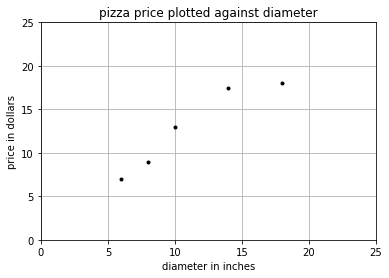

In [ ]:
plt.figure()
plt.title("pizza price plotted against diameter")
plt.xlabel("diameter in inches")
plt.ylabel("price in dollars")
plt.plot(X,y,"k.")
plt.axis([0, 25, 0, 25])
plt.grid(True)
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
test_pizza=np.array([[12]])
predicted_price=model.predict(test_pizza)[0]
print("the predicted price is ",predicted_price)


the predicted price is  13.681034482758621


In [ ]:
print("Residual sum of squares: %.2f" % np.mean((model.predict(X)-y)**2))

Residual sum of squares: 1.75


In [ ]:
x_bar=X.mean()
x_bar

11.2

In [ ]:
variance=((X-x_bar)**2).sum()/(X.shape[0]-1)
variance

23.2

In [ ]:
print(np.var(X,ddof=1))

23.2


In [ ]:

print(np.cov(X.transpose(),y)[0][1])

22.650000000000002


In [ ]:
covariance=np.cov(X.transpose(),y)[0][1]
beta=covariance/variance 
print(beta)


0.976293103448276


In [ ]:
X_test=np.array([8,9,11,16,12]).reshape(-1,1)
y_test=[11,8.5,15,18,11]
model.fit(X,y)
Rsquared=model.score(X_test,y_test)
print(Rsquared)

0.6620052929422553


In [ ]:
#classification with KNN
import numpy as np
import matplotlib.pyplot as plt

X_train=np.array([
[158,64],
[170,86],
[183,84],
[191,80],
[155,49],
[163,59],
[180,67],
[158,54],
[170,67]
])

y_train=['male','male','male','male','female','female','female','female','female']

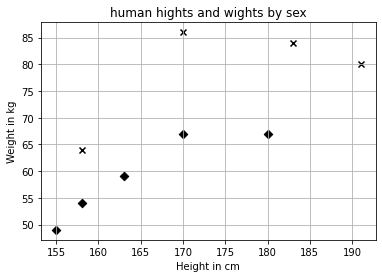

In [ ]:
plt.figure()
plt.title("human hights and wights by sex")
plt.xlabel("Height in cm")
plt.ylabel("Weight in kg")
for i,x in enumerate(X_train):
  plt.scatter(x[0],x[1],c='k',marker='x' if y_train[i]=='male' else 'D')

plt.grid(True)
plt.show()  

In [ ]:
x=np.array([[155,70]])
distances=np.sqrt(np.sum((X_train-x)**2,axis=1))
distances

array([ 6.70820393, 21.9317122 , 31.30495168, 37.36308338, 21.        ,
       13.60147051, 25.17935662, 16.2788206 , 15.29705854])

In [ ]:
nearest_neighbor_indices=distances.argsort()[:3]
nearest_neighbor_genders=np.take(y_train,nearest_neighbor_indices)
nearest_neighbor_genders


array(['male', 'female', 'female'], dtype='<U6')

In [ ]:
from collections import Counter
b=Counter(np.take(y_train,distances.argsort()[:3]))
b.most_common(1)[0][0]

'female'

In [ ]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.neighbors import KNeighborsClassifier

lb=LabelBinarizer()
y_train_binarized=lb.fit_transform(y_train)
y_train_binarized

array([[1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0]])

In [ ]:
k=3
clf=KNeighborsClassifier(n_neighbors=k)
clf.fit(X_train,y_train_binarized.reshape(-1))
prediction_binarized=clf.predict(np.array([155,70]).reshape(1,-1))[0]
predicted_label=lb.inverse_transform(prediction_binarized)
predicted_label

array(['female'], dtype='<U6')

In [ ]:
X_test=np.array([
                 [168,65],
                 [180,96],
                 [160,52],
                 [169,67]

])
y_test=['male','male','female','female']
y_test_binarized=lb.transform(y_test)
y_test_binarized.T[0]

array([1, 1, 0, 0])

In [ ]:
predictions_binarized=clf.predict(X_test)
lb.inverse_transform(predictions_binarized)

array(['female', 'male', 'female', 'female'], dtype='<U6')

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test_binarized,predictions_binarized)

0.75

In [ ]:
from sklearn.metrics import precision_score
precision_score(y_test_binarized,predictions_binarized)

1.0

In [ ]:
from sklearn.metrics import recall_score
recall_score(y_test_binarized,predictions_binarized)

0.5

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test_binarized,predictions_binarized)

0.6666666666666666

In [ ]:
from sklearn.metrics import classification_report
classification_report(y_test_binarized,predictions_binarized,
                      target_names=['male'],labels=[1])

'              precision    recall  f1-score   support\n\n        male       1.00      0.50      0.67         2\n\n   micro avg       1.00      0.50      0.67         2\n   macro avg       1.00      0.50      0.67         2\nweighted avg       1.00      0.50      0.67         2\n'

In [ ]:
#regression with KNN
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [ ]:
X_train=np.array([
                  [158,1],
                  [170,1],
                  [183,1],
                  [191,1],
                  [155,0],
                  [163,0],
                  [180,0],
                  [158,0],
                  [170,0]
])
y_train=[64,86,84,80,49,59,67,54,67]
X_test=np.array([
                  [168,1],
                  [180,1],
                  [160,0],
                  [169,0]
])
y_test=[65,96,52,67]


In [ ]:
k=3
clf=KNeighborsRegressor(n_neighbors=k)
clf.fit(X_train,y_train)
prediction=clf.predict(X_test)
print(prediction)
print(mean_absolute_error(y_test,prediction))
print(mean_squared_error(y_test,prediction))
print(r2_score(y_test,prediction))

[70.66666667 79.         59.         70.66666667]
8.333333333333336
95.8888888888889
0.6290565226735438


In [ ]:
from scipy.spatial.distance import euclidean
X_train=np.array([
                  [1700,1],
                  [1600,0]
])
x_test=np.array([1640,1]).reshape(1,-1)


In [ ]:
print(euclidean(X_train[0,:],x_test))
print(euclidean(X_train[1,:],x_test))

60.0
40.01249804748511


In [ ]:
X_train=np.array([
                  [1.7,1],
                  [1.6,0]
])
x_test=np.array([164,1]).reshape(1,-1)

In [ ]:
print(euclidean(X_train[0,:],x_test))
print(euclidean(X_train[1,:],x_test))

162.3
162.40307878855006


In [ ]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [ ]:
X_train_scaled=ss.fit_transform(X_train)
print(X_train)
print(X_train_scaled)

[[158   1]
 [170   1]
 [183   1]
 [191   1]
 [155   0]
 [163   0]
 [180   0]
 [158   0]
 [170   0]]
[[-0.9908706   1.11803399]
 [ 0.01869567  1.11803399]
 [ 1.11239246  1.11803399]
 [ 1.78543664  1.11803399]
 [-1.24326216 -0.89442719]
 [-0.57021798 -0.89442719]
 [ 0.86000089 -0.89442719]
 [-0.9908706  -0.89442719]
 [ 0.01869567 -0.89442719]]


In [ ]:
X_test_scaled=ss.transform(X_test)
clf.fit(X_train_scaled,y_train)
prediction=clf.predict(X_test_scaled)
print(prediction)
print(mean_absolute_error(y_test,prediction))
print(mean_squared_error(y_test,prediction))
print(r2_score(y_test,prediction))

[78.         83.33333333 54.         64.33333333]
7.583333333333336
85.13888888888893
0.6706425961745109
